# **Google Data Analytics Capstone: Bellabeat Case Study**

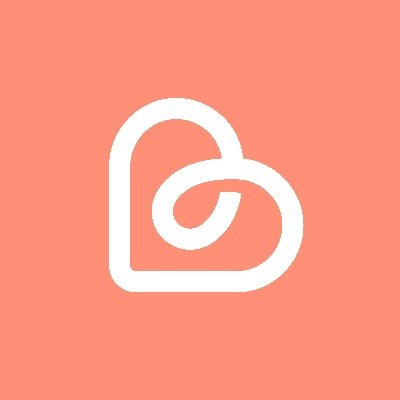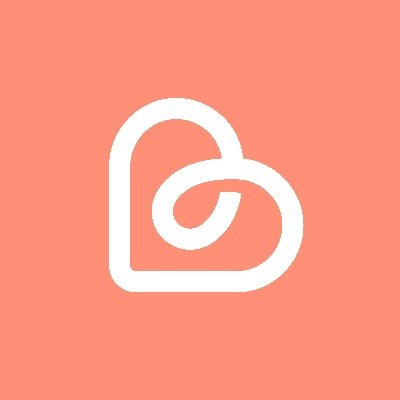

# ****About this project****

I am a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused
products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart
device fitness data could help unlock new growth opportunities for the company. I have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The
insights you discover will then help guide marketing strategy for the company.

# 1. ASK

# **Business Task**

The goal of this project is to explore more growth opportunities for a Bellabeat product. By analyzing smart device (non-Bellabeat product) usage data, we will be able to gain insight into how consumers are using their smart devices. Then, we could apply those trends to a Bellabeat product.

# **Stakeholders**
**Primary Stakeholder**

Urška Sršen: Bellabeat’s co-founder and Chief Creative Officer.

Sando Mur: Mathematician and Bellabeat’s co-founder.

**Seconday Stakeholder**

Bellabeat marketing analytics team.

# 2. PREPARE 

* We are going to use datasets generated by thirty eligible Fitbit users. The datasets are public domain and the users consented to the submissions of their personal tracked data.
* The datasets contain minute-level output for physical activity, heart rate, weight info, and sleep monitoring.
* Problems with the data, there is no unite of measure for the distance category. I’m not sure if it is KM or Miles.

# 3. PROCESS
* For this project, I will be using R


In [1]:
## Loading packages for data cleaning, manipulation, and viz
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
## Importing data set to R

activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# **4. ANALYZE**

In [3]:
## Taking a peak of the data set 
str(activity)
str (sleep)
str (weight)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [4]:
## Changing date format

activity <- activity %>% 
  rename (Date = ActivityDate) %>% 
  mutate (Date = as.Date(Date, format = "%m/%d/%y"))
sleep <- sleep %>%
  rename (Date = SleepDay) %>%
  mutate (Date = as.Date(Date, format = "%m/%d/%y"))
weight <- weight %>%
  mutate (Date = as.Date(Date, format = "%m/%d/%y"))

In [5]:
## merging cleaned data frames together

final_fb <- merge(merge(activity, sleep, by = c('Id', 'Date'), all = TRUE), weight, by = c('Id', 'Date'), all = TRUE)

In [6]:
## unique users
n_distinct(activity$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)
n_distinct(final_fb$Id)

[1] 33

[1] 24

[1] 8

[1] 33

* We can see that there's 33 user on Activity data set, 24 on Sleep data set, and only 8 on Weight data set

In [7]:
## Quick summary statistics
summary(final_fb)

       Id                 Date              TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2020-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2020-04-19   1st Qu.: 3795   1st Qu.: 2.620  
 Median :4.445e+09   Median :2020-04-26   Median : 7439   Median : 5.260  
 Mean   :4.858e+09   Mean   :2020-04-26   Mean   : 7652   Mean   : 5.503  
 3rd Qu.:6.962e+09   3rd Qu.:2020-05-04   3rd Qu.:10734   3rd Qu.: 7.720  
 Max.   :8.878e+09   Max.   :2020-05-12   Max.   :36019   Max.   :28.030  
                                                                          
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.000            Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.000            1st Qu.: 0.000    
 Median : 5.260   Median :0.000            Median : 0.220    
 Mean   : 5.489   Mean   :0.110            Mean   : 1.504    
 3rd Qu.: 7.715   3rd Qu.:0.000            3rd Qu.: 2.065    
 Max.   :28.030   Max.   :4.

**Important Statistics**

* Average Steps per day: 7652
* Average Calories burned per day: 2308
* Average time assleep: 419.5 minutes or 7 hours aprox
* Average Sedentary time per day: 990.4 minutes or 16.5 hours
* Average Very Active time per day: 21.21 minutes

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



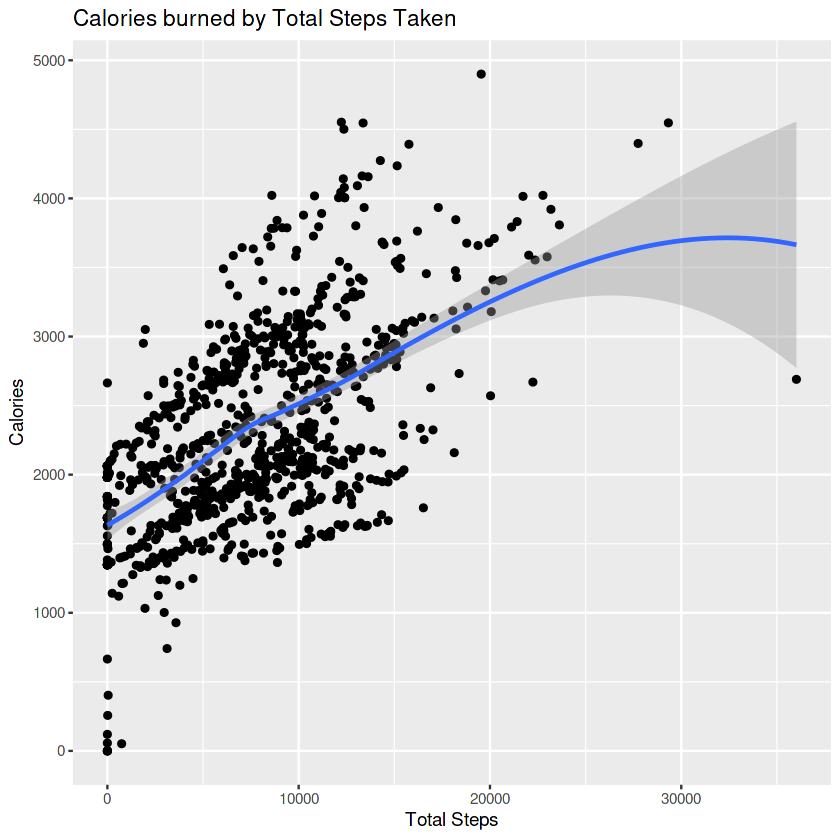

In [8]:
## data viz

ggplot(data = final_fb, aes(x = TotalSteps, y = Calories)) +  
  geom_point() + 
  geom_smooth() + 
  labs(title = 'Calories burned by Total Steps Taken', y = 'Calories', x = 'Total Steps')

* We can see that users who took more steps burned more calories

Warning message:
“Removed 530 rows containing missing values (geom_point).”


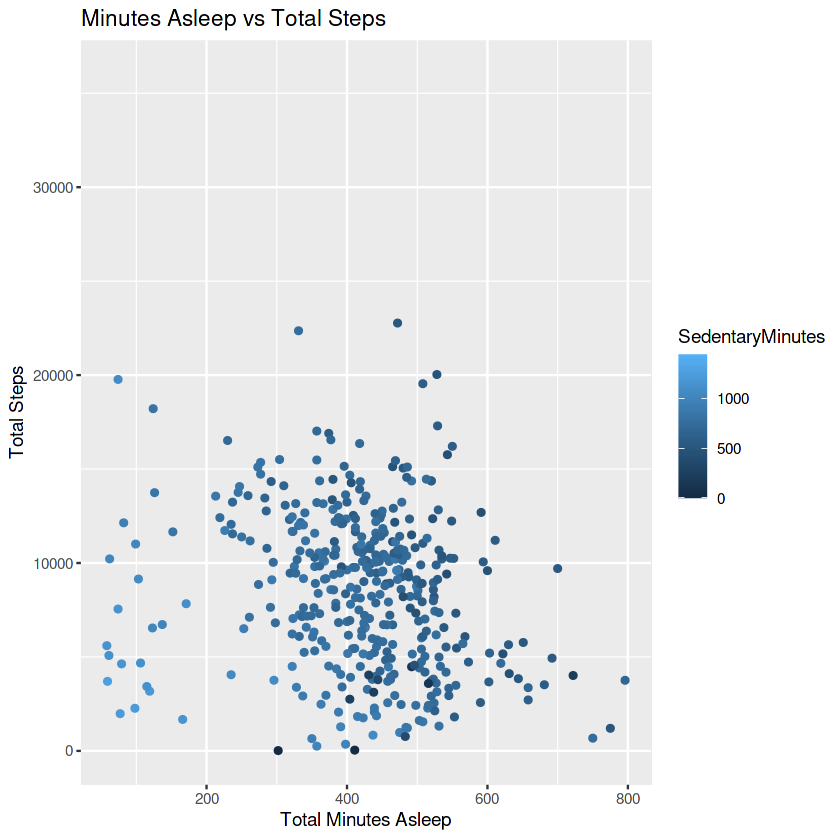

In [9]:
ggplot(data = final_fb, aes(x = TotalMinutesAsleep, y = TotalSteps, color = SedentaryMinutes)) + 
  geom_point() +
  labs(title = 'Minutes Asleep vs Total Steps', x = 'Total Minutes Asleep', y ='Total Steps')

* After visualizing this graph. There's no clear relation between Total Steps and Minutes Asleep. 
* However, users who spent more time asleep have lower sedentary minutes, interesting!

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 530 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 530 rows containing missing values (geom_point).”


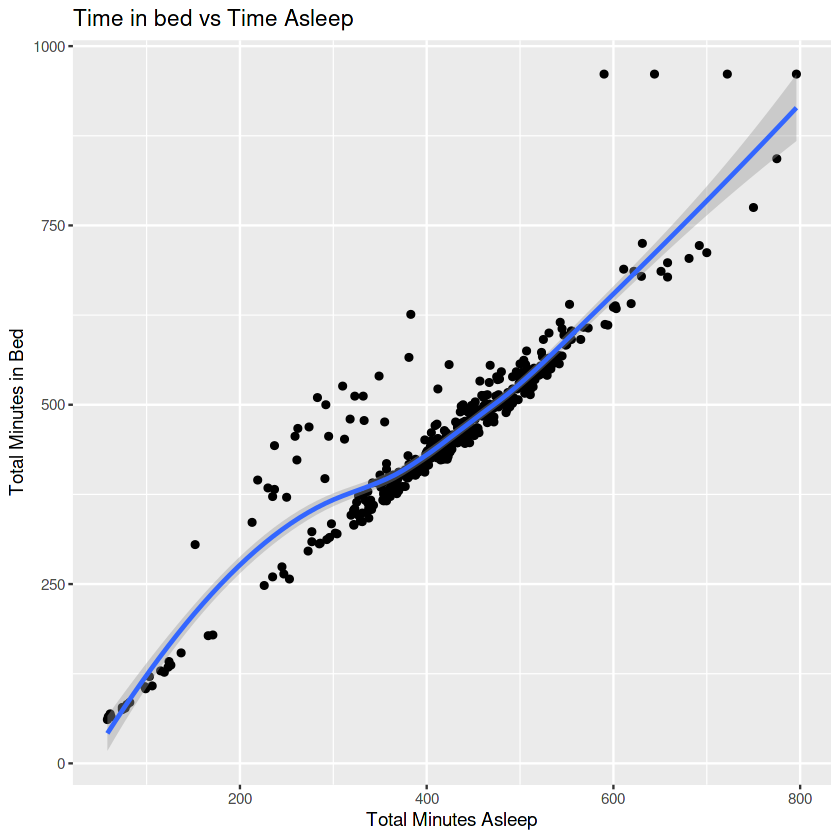

In [10]:
ggplot(data = final_fb, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) + 
  geom_point() + 
  geom_smooth() + 
  labs(title = 'Time in bed vs Time Asleep', x = 'Total Minutes Asleep', y ='Total Minutes in Bed')

* There's a clear relationship 1:1 between minutes in bed vs minutes asleep.
* However, there're some outliers. There's a possibility that some users stayed longer in bed while being awake or using their cellphone.

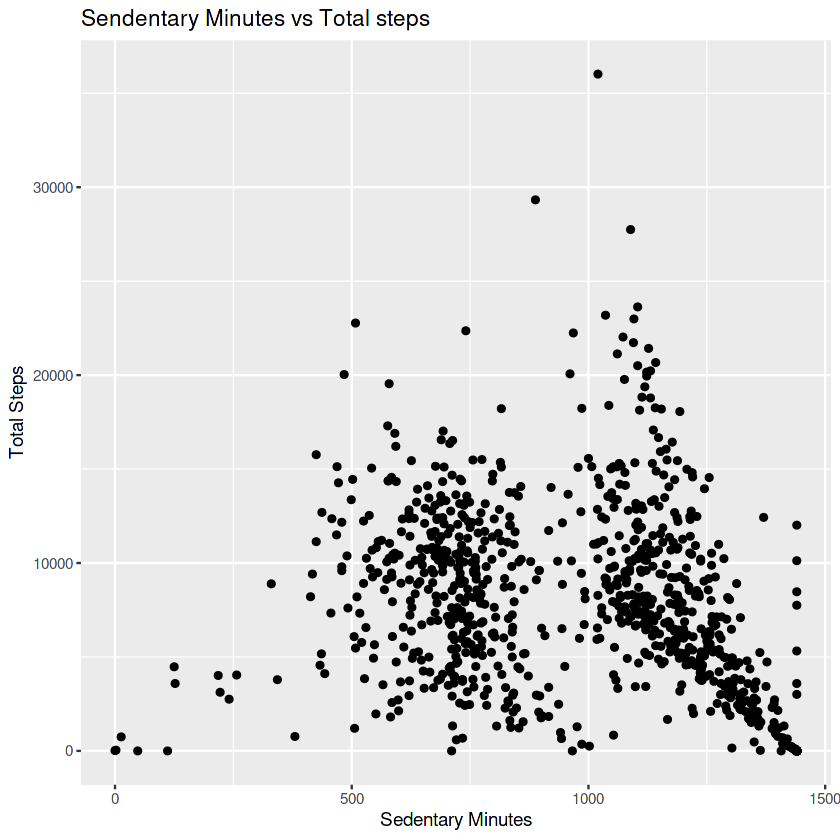

In [11]:
ggplot(data = final_fb, aes(x = SedentaryMinutes, y = TotalSteps)) + 
  geom_point() +
  labs(title = 'Sendentary Minutes vs Total steps', x = 'Sedentary Minutes', y ='Total Steps')

* It can be seen that users who were more sedentary took less steps. 

# **5. SHARE**

**Key Objectives**

There are interesting insights that the Bellabeat marketing analytics team can use for marketing campaigns or new ads.

* According to the data set, users spend on average 9.6 hours in the sedentary category (not including sleeping, 6.9 hours). Assuming they have regular office jobs of 8 hours, that will leave us with 1.6 hours. According to the US Census, the average one-way commute to work in the US is 27.6 minutes x 2 (back to home) 0.92 hours. We have 0.68 hours or 41 minutes left. Let's say they spent this time eating. To conclude, we can assume that the users of these smart devices are like "average joe" ordinary people. 


* All things considered, developing casual-looking watches with all current features like sleep tracking, activity tracking could attract new customers. Those 33 Fitbit users weren't very active people at so perhaps a sports watch isn't the best idea.


* As we saw earlier, only 8 out of 33 users reported their weight. We can develop a smart scale that displays your weight and syncs it to the Bellabeat app. Users will be able to see their past, current, and future weight according to their current activity from the Bellabeat watch. This idea will promote Bellabeat's digital eco-system and perhaps increase product sales.

